In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

df = pd.read_csv('/Users/yashsingh/Desktop/Data Analytics and Visualization/Week 2/JK-Allopathic-Outpatient_attendance-May-2019.csv')

fb = pd.read_csv('/Users/yashsingh/Desktop/Data Analytics and Visualization/Week 2/Fifa_player_football_data.csv')

In [4]:
range_columns = ['No. of facilities by performance - 1 to 100',
                    'No. of facilities by performance - 101 to 500',
                    'No. of facilities by performance - 501 to 1000',
                    'No. of facilities by performance - >1000']

# Compute total patient attendance for each district across the four range groups
df['total_attendance'] = df[range_columns].sum(axis=1)


In [6]:
# Group by district and sum the total attendance
total_attendance_by_district = df.groupby('District')['total_attendance'].sum()


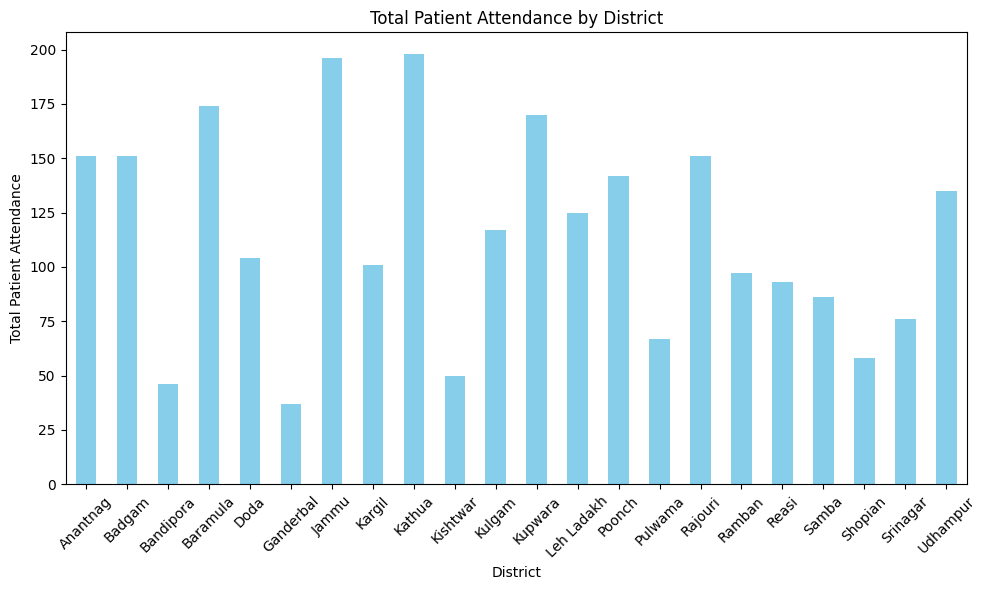

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
total_attendance_by_district.plot(kind='bar', color='skyblue')
plt.title('Total Patient Attendance by District')
plt.xlabel('District')
plt.ylabel('Total Patient Attendance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

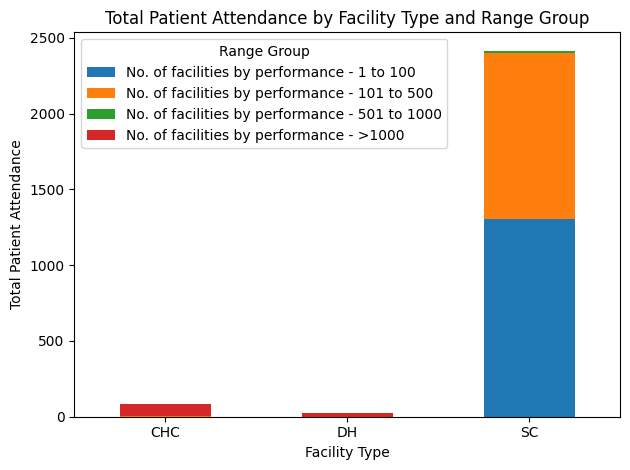

In [8]:
# Compute total patient attendance for each Facility Type across the four range groups
grouped_by_facility = df.groupby('Facility Type')[range_columns].sum()

# Plotting
plt.figure(figsize=(10, 6))
grouped_by_facility.plot(kind='bar', stacked=True)
plt.title('Total Patient Attendance by Facility Type and Range Group')
plt.xlabel('Facility Type')
plt.ylabel('Total Patient Attendance')
plt.xticks(rotation=0)
plt.legend(title='Range Group')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

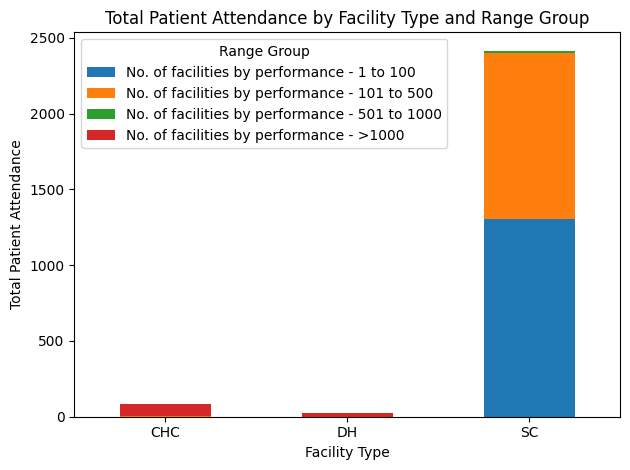

In [9]:
# Compute total patient attendance for each Facility Type across the four range groups
grouped_by_facility = df.groupby('Facility Type')[range_columns].sum()

# Plotting
plt.figure(figsize=(10, 6))
grouped_by_facility.plot(kind='bar', stacked=True)
plt.title('Total Patient Attendance by Facility Type and Range Group')
plt.xlabel('Facility Type')
plt.ylabel('Total Patient Attendance')
plt.xticks(rotation=0)
plt.legend(title='Range Group')
plt.tight_layout()
plt.show()


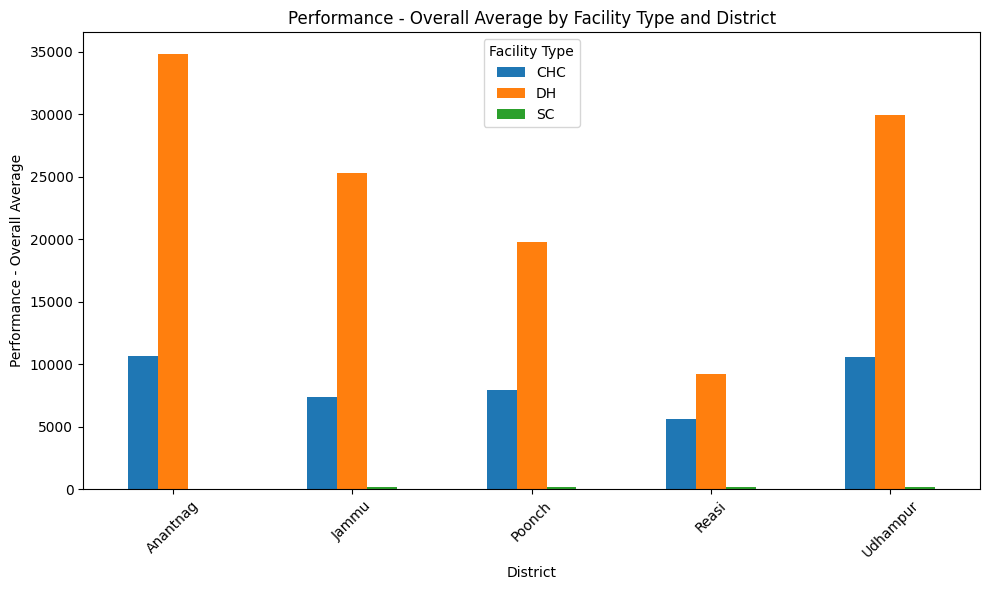

In [10]:
districts = ['Anantnag', 'Jammu', 'Poonch', 'Reasi', 'Udhampur']
filtered_df = df[df['District'].isin(districts)]

# Group by 'District' and 'Facility Type' and compute mean of 'Performance - Overall Average'
grouped_data = filtered_df.groupby(['District', 'Facility Type'])['Performance - Overall Average **'].mean().unstack()

# Plotting
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Performance - Overall Average by Facility Type and District')
plt.xlabel('District')
plt.ylabel('Performance - Overall Average')
plt.xticks(rotation=45)
plt.legend(title='Facility Type')
plt.tight_layout()
plt.show()

selected_districts = df['District'].unique()[:20]

# Filter data for selected districts
filtered_df = df[df['District'].isin(selected_districts)]


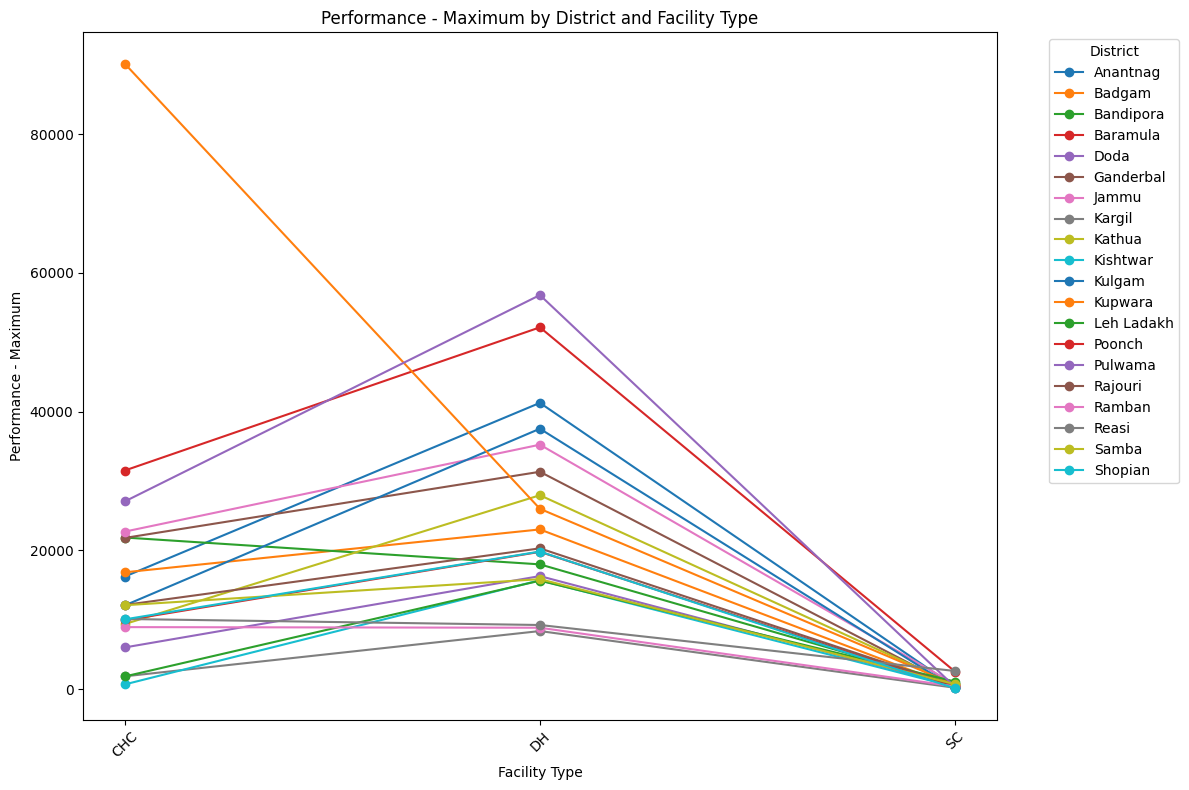

In [11]:
# Group by 'District' and 'Facility Type', and aggregate 'Performance - Maximum'
grouped_data = filtered_df.groupby(['District', 'Facility Type'])['Performance - Maximum'].max().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
for district in selected_districts:
    district_data = grouped_data[grouped_data['District'] == district]
    plt.plot(district_data['Facility Type'], district_data['Performance - Maximum'], marker='o', label=district)

plt.title('Performance - Maximum by District and Facility Type')
plt.xlabel('Facility Type')
plt.ylabel('Performance - Maximum')
plt.xticks(rotation=45)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


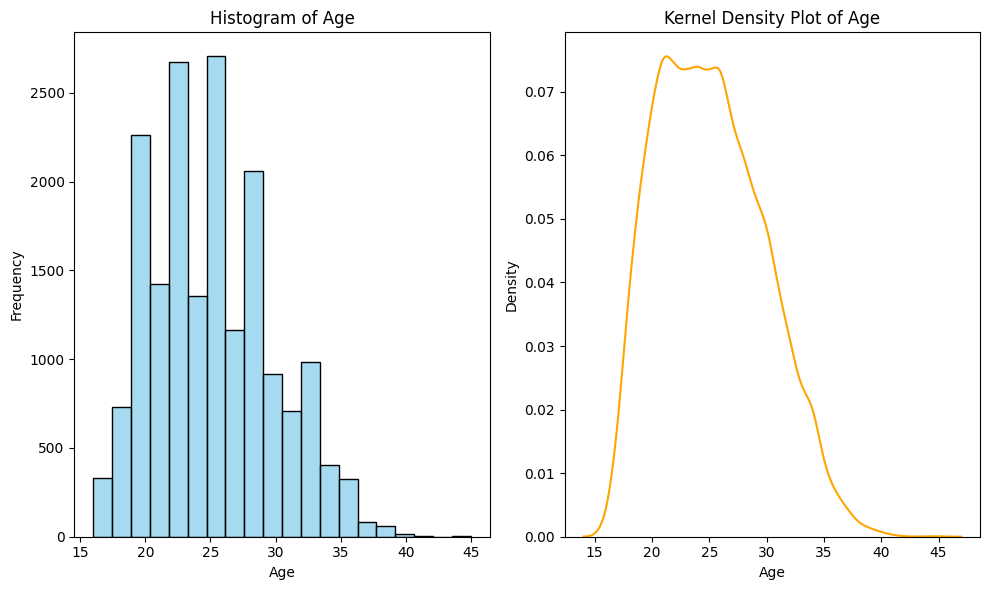

In [12]:
# Now for Football data

plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(fb['Age'], bins=20, kde=False, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Kernel density plot
plt.subplot(1, 2, 2)
sb.kdeplot(fb['Age'], color='orange')
plt.title('Kernel Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

clubs = ['FC Barcelona', 'Chelsea', 'Juventus', 'Real Madrid']
club_data = fb[fb['Club'].isin(clubs)]


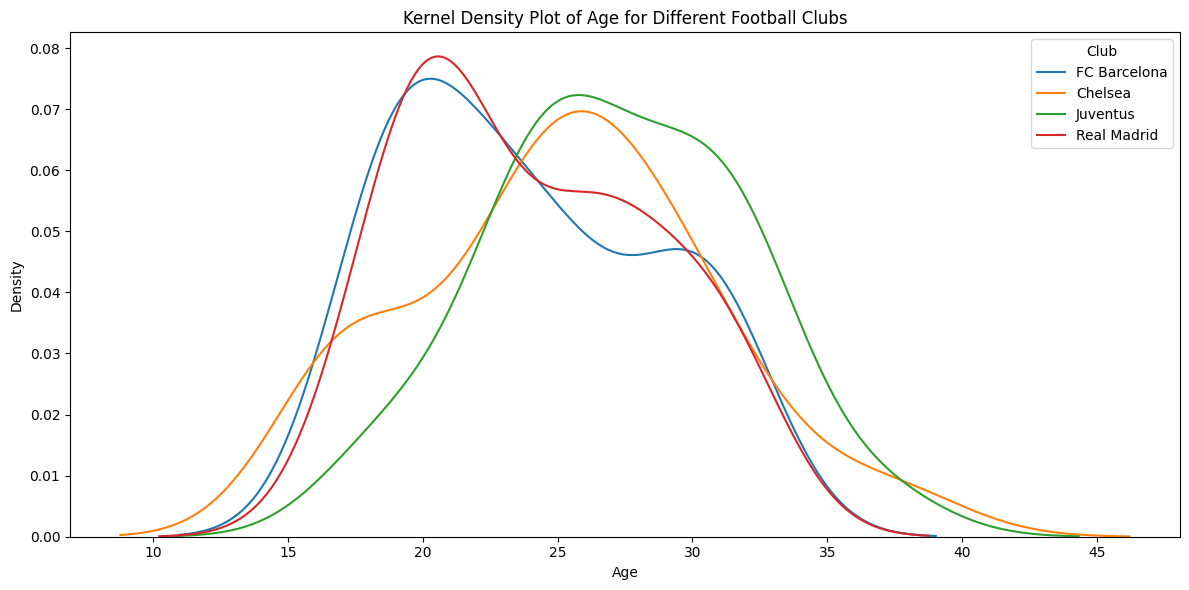

In [13]:
# Plotting Kernel Density plots for each club
plt.figure(figsize=(12, 6))

for club in clubs:
    sb.kdeplot(club_data[club_data['Club'] == club]['Age'], label=club)

plt.title('Kernel Density Plot of Age for Different Football Clubs')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Club')
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


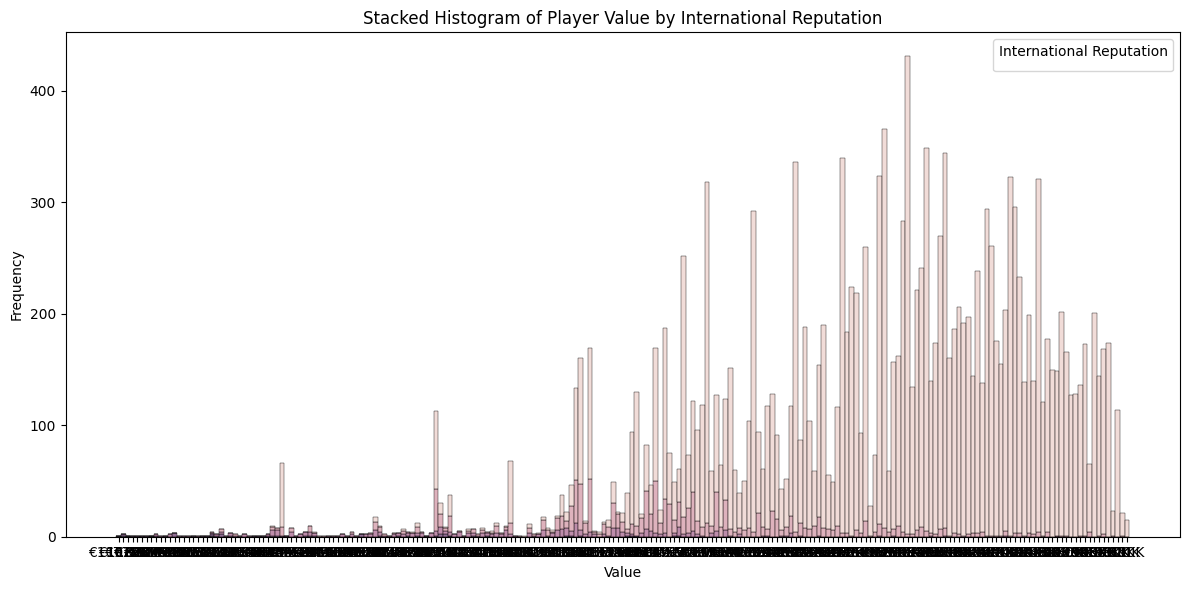

In [14]:
# Filtering data for players with preferred foot as right or left
filtered_data = fb[fb['Preferred Foot'].isin(['Right', 'Left'])]

# Plotting stacked histogram
plt.figure(figsize=(12, 6))
sb.histplot(data=fb, x='Value', hue='International Reputation', multiple='stack', bins=50, kde=False)
plt.title('Stacked Histogram of Player Value by International Reputation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(title='International Reputation')
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 800x600 with 0 Axes>

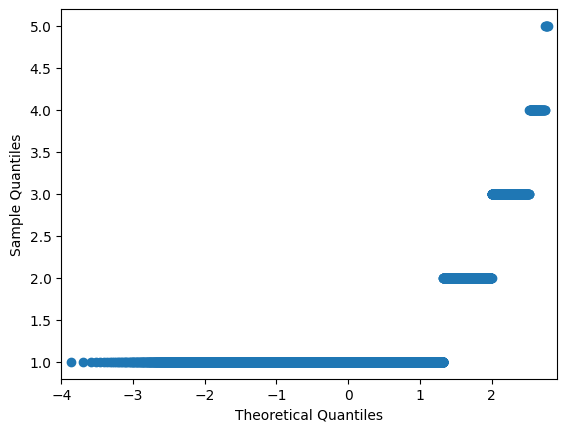

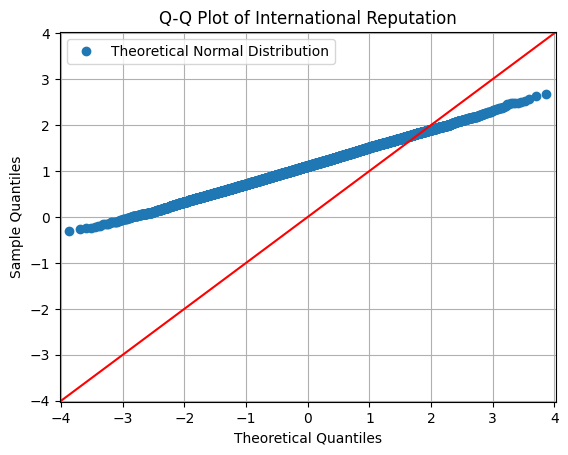

In [15]:
# Extracting the "International Reputation" column
international_reputation = fb['International Reputation']

# Generate a theoretical normal distribution for comparison
normal_distribution = np.random.normal(np.mean(international_reputation), np.std(international_reputation), len(international_reputation))

# Create Q-Q plot
plt.figure(figsize=(8, 6))
sm.qqplot(international_reputation, line='s', color='blue', label='International Reputation', marker='o')
sm.qqplot(normal_distribution, line='45', color='red', label='Theoretical Normal Distribution', marker='o')
plt.title('Q-Q Plot of International Reputation')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.legend()
plt.grid(True)
plt.show()